### **_Authors Note:_** Text was written by Osiris Valdez, Text was edited and Code was written by Michael Stutz.

# Hierarchical Equal Risk Contribution (HERC) Portfolio

In the ever-evolving landscape of investment strategies, the **HERC Portfolio** has emerged as a sophisticated approach to risk management and asset allocation. Originating from quantitative finance, this portfolio management concept takes a meticulously structured view of risk, aiming to achieve a harmonious balance across multiple layers of a diversified portfolio hierarchy. Throughout this presentation, we will discuss the origins and principles behind the HERC Portfolio and how it distinguishes itself from the more traditional Risk Parity Portfolio. Lastly, we will present an example of the HERC model. We hope to shed light on the potential benefits and complexities associated with implementing the HERC approach in modern investment strategies.

## Origins of the HERC Portfolio

The HERC Portfolio model was developed by **Thomas Raffinot**, a French economist and quantitative finance specialist. In 2018, Raffinot published [*“The Hierarchical Equal Risk Contribution Portfolio”*](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3237540), proposing the HERC algorithm. The model is designed to achieve risk parity at multiple hierarchical levels within a diversified investment portfolio. While risk parity strategies have been used for some time, Raffinot's HERC model represents a particular approach to implementing risk parity, focusing on hierarchical risk balancing. 

The HERC model combines the **Hierarchical Clustering Based Asset Allocation (HCAA)** algorithm and the **Hierarchical Risk Parity (HRP)** portfolio model. The model consists of four significant steps:

1. Hierarchical tree clustering.
2. Selecting the optimal number of clusters.
3. Top-down recursive bisection.
4. Naive risk parity within the clusters.

The HERC portfolio extends the concept of the Risk Parity Portfolio by further optimizing the allocation of assets within asset classes or sectors. It is designed to achieve an equal contribution of risk at multiple levels of a portfolio hierarchy, helping to ensure risk is evenly distributed across different assets, sub-asset classes, and even individual positions. The HERC is a more granular approach to risk management than the traditional Risk Parity Portfolio.

## How the HERC Portfolio Works

1. **Hierarchy**: 
    - Investments are organized into a hierarchical structure. At the highest level, you may have broad asset classes, such as stocks, bonds, real estate, and commodities. These asset classes can be further divided into sub-asset classes or sectors.
2. **Risk Parity at Each Level**: 
    - At each level of the hierarchy, the goal is to achieve risk parity. This means that each asset class, sub-asset class, or sector contributes an equal amount of risk to the overall portfolio.
3. **Risk Assessment**: 
    - The portfolio manager assesses the risk associated with each asset, sub-asset, or sector. This can be done using various risk measures, such as volatility, standard deviation, or other statistical metrics. The goal is to quantify and equalize the risk contributions.
4. **Allocation**: 
    - Based on the risk assessment, assets are allocated so that their contributions to the portfolio's overall risk are equal. This typically involves allocating more capital to lower-risk assets and less to higher-risk assets within each category.
5. **Rebalancing**: 
    - The HERC Portfolio requires regular rebalancing because asset values and risk profiles change over time. Rebalancing ensures that the risk parity is maintained as market conditions evolve.

The main advantage of the HERC Portfolio is that it seeks to provide a more balanced and stable risk-return profile by addressing risk at multiple levels within a diversified portfolio. This approach can benefit risk-averse investors who want to minimize the impact of large fluctuations in a specific asset or sector. It is essential to note that implementing a HERC portfolio can be complex and may require sophisticated risk assessment tools and constant monitoring.

## Comparing HERC Portfolio with the Risk Parity Portfolio

When considering portfolio management strategies, it's essential to understand the distinctions between the HERC portfolio and the traditional Risk Parity Portfolio. While both aim to balance risk in diversified portfolios, they do so with differing levels of granularity and complexity:

1. **Level of Granularity**:
   - **HERC Portfolio**: Takes a more granular approach by considering risk allocation at multiple levels within a portfolio hierarchy. It aims to achieve equal risk contributions not only at the overall portfolio level but also within each asset class, sub-asset class, sector, or even individual positions. 
   - **Risk Parity Portfolio**: The Risk Parity Portfolio primarily focuses on balancing risk between broad asset classes, such as stocks, bonds, and commodities, and does not consider risk at sub-asset class, sector, or individual position levels.

2. **Asset Allocation**:
   - **HERC Portfolio**: Allocates assets based on their risk contributions within each hierarchy level. This means lower-risk assets can receive larger allocation, while higher-risk assets receive a smaller allocation within each category.
   - **Risk Parity Portfolio**: The Risk Parity Portfolio allocates assets among broad asset classes based on their overall risk. It typically uses historical or implied volatility to determine the allocation of capital to each asset class. 

3. **Complexity**:
   - **HERC Portfolio**: More complex to implement and manage.
   - **Risk Parity Portfolio**: Simpler to implement and understand.

4. **Risk Management Objectives**:
   - **HERC Portfolio**: Is well-suited for investors who are looking for fine-grained risk management within their portfolio. It is more appropriate for those who want to control risk not only at the overall portfolio level but also at lower levels of the asset hierarchy.
   - **Risk Parity Portfolio**: The Risk Parity Portfolio is a broader risk-balancing strategy suitable for investors who aim to create diversified portfolios that achieve a balanced risk-return profile by focusing on asset classes.

The key difference between the HERC Portfolio and the Risk Parity Portfolio is the level of granularity at which they manage risk. The HERC Portfolio takes a hierarchical approach, striving to achieve risk parity at multiple levels, while the Risk Parity Portfolio focuses on balancing risk between broad asset classes.


## HERC Portfolio Implementation
### First: Asset Selection

The ETFs included in this portfolio attempted take a broad spectrum around the market.

In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import datetime
import random
import riskfolio as rp
import matplotlib.patches as patches
from HERC import PortfolioAnalysis, HERCPortfolioAnalysis

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list
from scipy.spatial.distance import pdist, squareform

TICKER_NAME_MAPPING = {
    'SPY': 'S&P 500',
    'TLT': '20+ Year Treasury',
    'UUP': 'US Dollar Index',
    'DBC': 'Commodity Index',
    'VWO': 'Emerging Markets',
    'GLD': 'Gold',
    'DGL': 'DB Gold Fund',
    'IAU': 'Gold Trust',
    'DBP': 'DB Precious Metals Fund',
    'PALL': 'Physical Palladium Shares',
    'RING': 'Global Gold Miners',
    'GDX': 'Gold Miners',
    'ITM': 'AMT-Free Intermediate Municipal',
    'MBB': 'MBS ETF',
    'AGG': 'Core U.S. Aggregate Bond',
    'LQD': 'iBoxx $ Investment Grade Corporate Bond',
    'HYG': 'iBoxx $ High Yield Corporate Bond',
    'EMB': 'JP Morgan USD Emerging Markets Bond',
    'JNK': 'SPDR Barclays High Yield Bond',
    'KWEB': 'CSI China Internet',
    'DBS': 'DB Silver Fund',
    'SIVR': 'Physical Silver Shares',
    'SLV': 'Silver Trust',
    'XLK': 'Technology Select Sector',
    'PPA': 'Aerospace & Defense',
    'IHF': 'U.S. Healthcare Providers',
    'SYLD': 'Multi-Asset Income',
    'XLY': 'Consumer Discretionary Select Sector Fund',
    'XLP': 'Consumer Staples Select Sector Fund',
    'XLE': 'Energy Select Sector Fund',
    'XLF': 'Financial Select Sector Fund',
    'XLI': 'Industrial Select Sector Fund',
    'XLK': 'Technology Select Sector Fund',
    'XLB': 'Materials Select Sector Fund',
    'XME': 'S&P Metals & Mining ETF',
    'XBI': 'SPDR S&P Biotech ETF',
    'XLU': 'Utilities Select Sector Fund',
    'DBB': 'DB Base Metals Fund',
    'QVAL': 'QuantShares U.S. Market Neutral Value',
    'QWLD': 'SPDR MSCI World StrategicFactors',
    'QEMM': 'SPDR MSCI Emerging Markets StrategicFactors',
    'PDBC': 'Optimum Yield Diversified Commodity Strategy',
    'PDP': 'DWA Momentum',
    'PBE': 'Dynamic Biotechnology & Genome',
    'PBJ': 'Dynamic Food & Beverage',
    'PEJ': 'Dynamic Leisure & Entertainment',
    'PJP': 'Dynamic Pharmaceuticals',
    'PSJ': 'Dynamic Software',
}

tickers = list(TICKER_NAME_MAPPING.keys())

## Below we can see the Cumulative return of each ETF, the SML, and the correlation matrix.


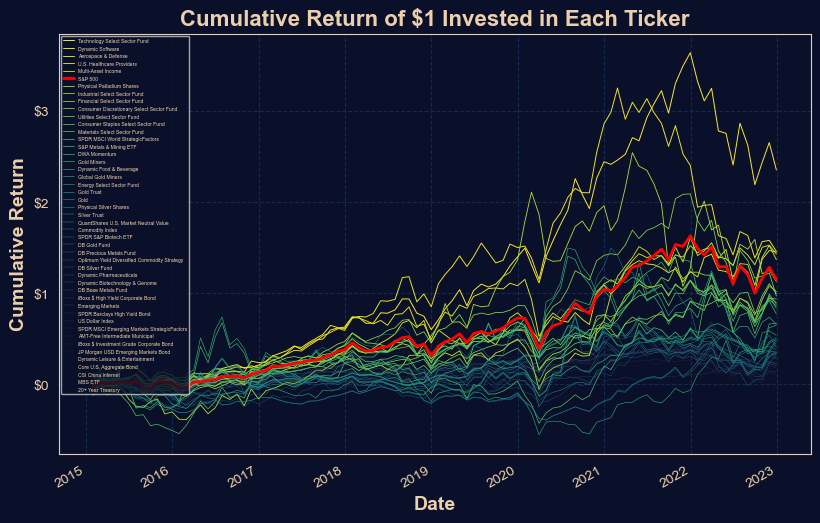

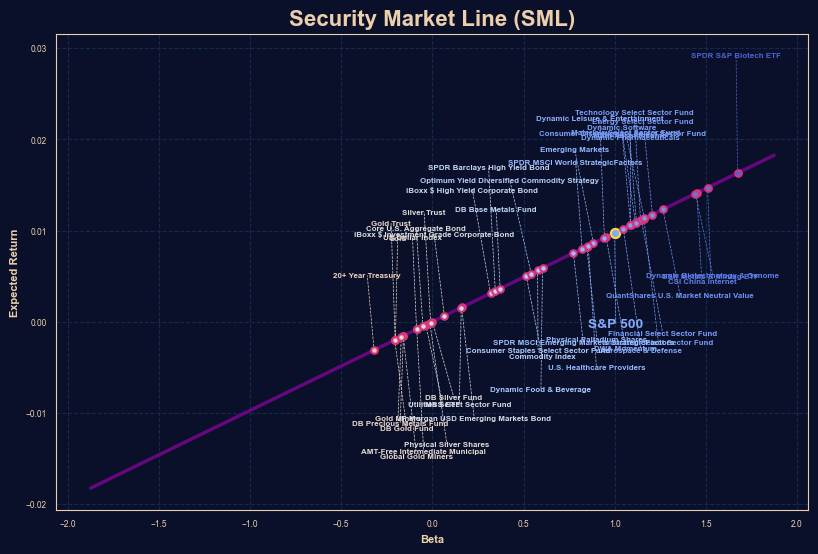

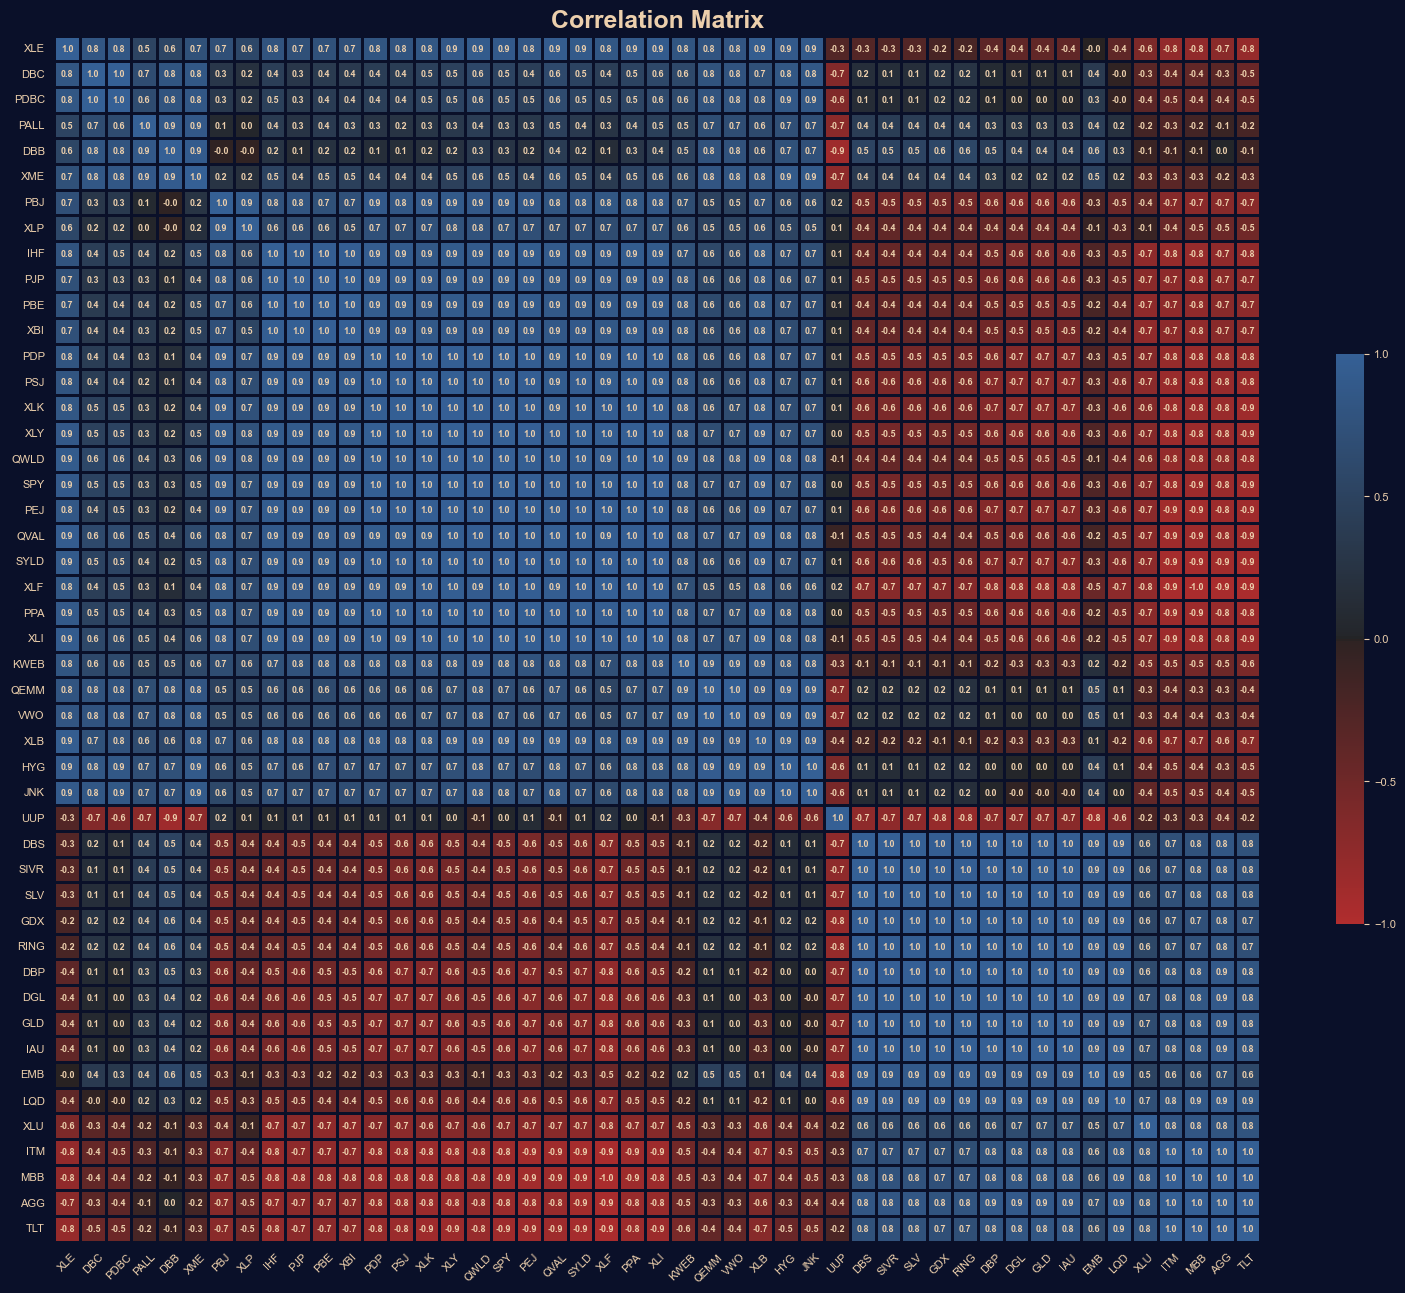

In [7]:
herc_analysis = HERCPortfolioAnalysis("ETF.csv", tickers, 2015, 2019)
herc_analysis.preprocess()  
herc_analysis.compute_returns() 
herc_analysis.plot_cumulative_tickers()
herc_analysis.plot_sml(tickers)
herc_analysis.plot_correlation_matrix()

## Using Riskfolio-Lib, we now compute the Risk Parity Portfolio and the HERC Portfolio, along with their statistics and returns.

---------------------------------------------HERC Portfolio Analysis Report---------------------------------------------
Total Assets in Portfolio: 47
Date Range: 2015 to 2019

------------------------------------------------------------------------------------------------------------------------

                                               Portfolio Analysis Report                                                
------------------------------------------------------------------------------------------------------------------------

Tickers: AGG, DBB, DBC, DBP, DBS, DGL, EMB, GDX, GLD, HYG, IAU, IHF, ITM, JNK, KWEB, LQD, MBB, PALL, PBE, PBJ, PDBC,
         PDP, PEJ, PJP, PPA, PSJ, QEMM, QVAL, QWLD, RING, SIVR, SLV, SPY, SYLD, TLT, UUP, VWO, XBI, XLB, XLE, XLF, XLI,
         XLK, XLP, XLU, XLY, XME
Date: 2015 to 2019
------------------------------------------------------------------------------------------------------------------------

Weights, Risk Contributions, HERC RC & Metrics:

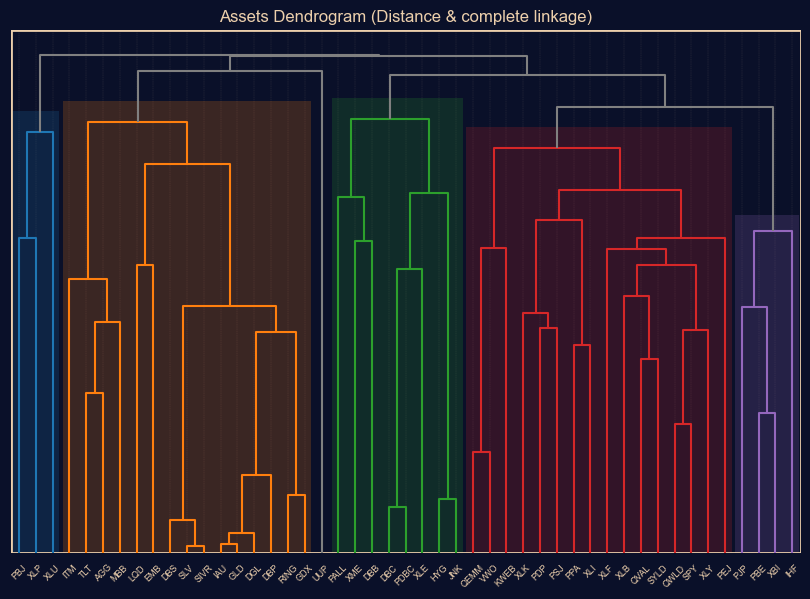

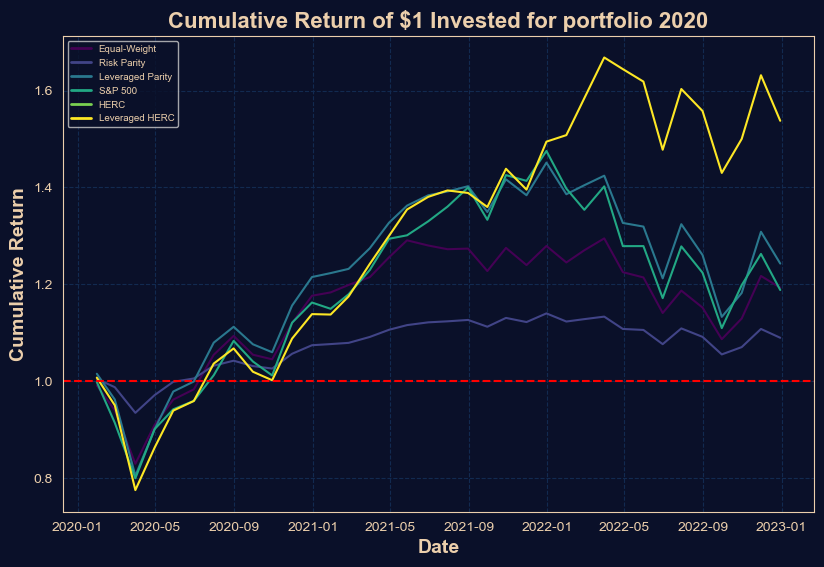

In [3]:
herc_analysis = HERCPortfolioAnalysis("ETF.csv", tickers, 2015, 2019)
herc_analysis.preprocess()  
Returns = herc_analysis.Dwide

port = rp.HCPortfolio(Returns)

model='HERC' # Could be HRP or HERC or HERC2
correlation = 'distance' # Correlation matrix used to group assets in clusters (default is 'pearson')
rm = 'MAD' # Risk measure used, you can change this to a great many options
# I used MAD because it is robust to outliers, MAD is Median Absolute Deviation
rf = 0 # Risk free rate
linkage = 'complete' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True

w = port.optimization(model=model,
                      correlation=correlation,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

fig, ax = plt.subplots(figsize=(8.2, (10* 0.618)))
ax = rp.plot_dendrogram(Returns, codependence='distance', 
                                    linkage='complete', 
                                    height=10,
                                    width=8.2*0.618, 
                                    leaf_order=True,
                                    ax=ax)

fig.patch.set_facecolor('#0a1029')
ax.set_facecolor('#0a1029')

ax.tick_params(axis='x', colors='#eccfac')
ax.tick_params(axis='y', colors='#eccfac')

ax.edgecolor='#eccfac'


ax.tick_params(axis='both', which='major', labelsize=6.5, rotation=45, color="#eccfac")

ax.grid(lw=0.3, alpha=0.2, color="#eccfac")
ax.edgecolor='#eccfac'
ax.set_axisbelow(True)
rect = patches.Rectangle((0,0),1,1, transform=ax.transAxes, edgecolor='#eccfac', facecolor='none', lw=2)
ax.add_patch(rect)


herc_analysis.compute_returns(weights=w['weights'])
herc_analysis.herc_report(weights = w['weights']) 
herc_analysis.plot_herc_cumulative_returns(weights = w['weights'])

## Digging in further, we can see the benefits of the HERC portfolio, here are measures of the portfolio weights and how they differ based on the Risk Measure used. 

In [4]:
rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          correlation=correlation,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='bone_r')

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
AGG,5.81%,14.13%,5.95%,6.12%,7.64%,6.96%,8.96%,6.90%,4.95%,4.43%,8.13%,7.79%,8.44%,8.16%,8.16%,8.28%,48.41%,17.61%,31.68%,41.76%,44.67%,27.35%
DBB,3.12%,1.36%,2.83%,3.27%,2.32%,2.99%,2.86%,3.55%,4.10%,4.30%,1.89%,1.76%,1.62%,1.78%,1.86%,1.72%,0.36%,1.10%,2.03%,0.58%,2.77%,0.55%
DBC,3.25%,1.49%,3.13%,3.07%,2.47%,2.73%,2.90%,2.65%,2.68%,2.60%,1.87%,1.77%,1.65%,1.75%,1.82%,1.83%,0.05%,0.29%,0.65%,0.12%,0.41%,0.11%
DBP,1.25%,0.66%,1.22%,1.34%,1.15%,1.31%,1.34%,1.44%,1.37%,1.36%,1.40%,0.81%,1.37%,1.36%,1.37%,1.04%,0.19%,1.59%,0.75%,0.34%,0.21%,0.61%
DBS,0.88%,0.32%,0.85%,0.98%,0.75%,0.93%,1.09%,1.12%,1.08%,1.09%,0.75%,0.41%,0.72%,0.72%,0.73%,0.54%,0.04%,0.56%,0.85%,0.09%,0.00%,0.14%
DGL,1.33%,0.74%,1.32%,1.42%,1.27%,1.40%,1.42%,1.48%,1.37%,1.32%,1.45%,1.01%,1.53%,1.44%,1.44%,1.25%,0.37%,2.54%,1.15%,0.62%,0.40%,1.14%
EMB,3.12%,4.07%,3.06%,3.10%,3.69%,3.54%,4.17%,3.60%,2.89%,2.64%,3.94%,4.62%,3.93%,3.90%,3.91%,4.22%,0.04%,0.38%,0.11%,0.06%,0.00%,0.13%
GDX,0.50%,0.11%,0.54%,0.56%,0.55%,0.57%,0.64%,0.60%,0.53%,0.50%,0.67%,0.36%,0.61%,0.63%,0.64%,0.45%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GLD,1.34%,0.75%,1.32%,1.43%,1.31%,1.44%,1.45%,1.51%,1.41%,1.36%,1.53%,1.25%,1.64%,1.53%,1.51%,1.45%,0.40%,2.30%,0.95%,0.63%,0.43%,1.18%
HYG,0.61%,0.88%,0.71%,0.59%,0.84%,0.65%,0.54%,0.62%,0.71%,0.75%,0.59%,1.28%,0.53%,0.57%,0.59%,0.86%,0.00%,0.03%,0.02%,0.02%,0.10%,0.02%


## Lastly, we visualize the Risk Contribution per individual Asset for our HERC Portfolio.

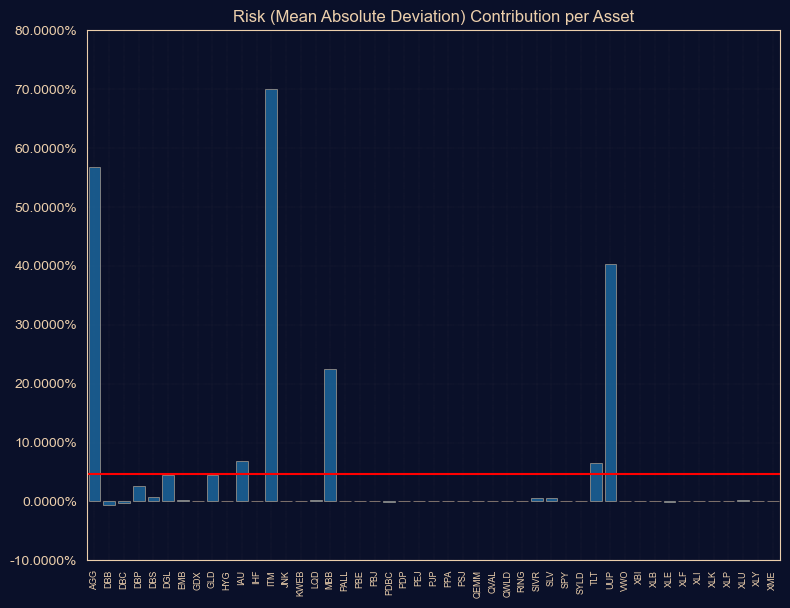

In [5]:
mu = Returns.mean()
cov = Returns.cov() # Covariance matrix
returns = Returns # Returns of the assets

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, (10* 0.618)))

fig.patch.set_facecolor('#0a1029')
ax.set_facecolor('#0a1029')

ax.tick_params(axis='x', colors='#eccfac')
ax.tick_params(axis='y', colors='#eccfac')

ax.edgecolor = '#eccfac'
ax.tick_params(axis='x', which='major', labelsize=6.5, rotation=45, color="#eccfac")
ax.grid(lw=0.3, alpha=0.2, color="#eccfac")

rp.PlotFunctions.plot_risk_con(w=w,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       color="tab:blue",
                       height=6,
                       width=10,
                       t_factor=12,
                       ax=ax,)

# Adjust the properties of the bars after they've been plotted
for bar in ax.patches:
    bar.set_edgecolor('#eccfac')
    bar.set_linewidth(0.5)